X1 ~ R(-5, 5)
X2 ~ R(-5, 5)
X3 ~ N(-5, 3)


In [2]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой
import seaborn

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

from statsmodels.stats.weightstats import ztest as ztest

plt.style.use('ggplot')    # стиль графиков

%matplotlib inline

In [3]:
np.random.seed(404)

m_x1 = -1
m_x2 = -2
m_x3 = 2

var_x1 = 2 ** 2
var_x2 = (0+2)**2/12
var_x3 = 1 ** 2

n1 = 100
n2 = 100
n3 = 200

X1 = np.random.normal(-1, 2, n1)

X2 = np.random.uniform(-2, 0, n2)

X3 = np.random.normal(2, 1, n3)

In [4]:
m_x1, var_x1, np.sqrt(var_x1)

(-1, 4, 2.0)

In [5]:
m_x2, var_x2, np.sqrt(var_x2)

(-2, 0.3333333333333333, 0.5773502691896257)

In [6]:
m_x3, var_x3, np.sqrt(var_x3)

(2, 1, 1.0)

In [7]:
m1 = np.mean(X1)
v1 = np.var(X1, ddof = 1)
s1 = np.std(X1, ddof = 1)
m1, v1, s1

(-0.7764808262435907, 4.019749373354324, 2.004931263997428)

In [8]:
m2 = np.mean(X2)
v2 = np.var(X2, ddof = 1)
s2 = np.std(X2, ddof = 1)
m2, v2, s2

(-0.9711955586251331, 0.3292866458052031, 0.5738350336161109)

In [9]:
m3 = np.mean(X3)
v3 = np.var(X3, ddof = 1)
s3 = np.std(X3, ddof = 1)
m3, v3, s3

(2.025458818624577, 0.9530946999180973, 0.9762656912532045)

In [10]:
mean_pol = (n1 * m1 + n2 * m2 + n3 * m3)/(n1 + n2 + n3)
var_pol = ((n1 - 1) * v1 + (n2 - 1) * v2 + (n3 - 1) * v3) / (n1 + n2 + n3 - 3) #вопрос
std_pol = var_pol**(1/2)
n_pol = n1 + n2 + n3
print(f"Pooled for X1, X2, X3: {mean_pol = :.3f}; {var_pol = :.3f}; {std_pol = :.3f}; {n_pol = :.3f}")

Pooled for X1, X2, X3: mean_pol = 0.576; var_pol = 1.562; std_pol = 1.250; n_pol = 400.000


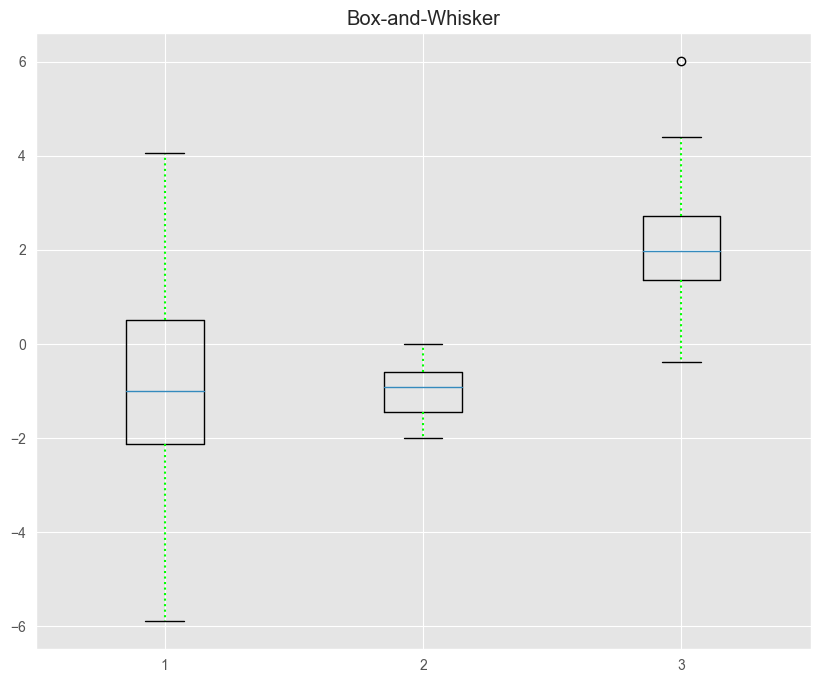

In [11]:
#plt.boxplot(sample1)
data = [X1, X2, X3]

fig = plt.figure(figsize =(10, 8))
bp = plt.boxplot(data)
for whisker in bp['whiskers']:
    whisker.set(color ='lime',
                linewidth = 1.5,
                linestyle =":")
# plt.boxplot(data,patch_artist = True,
#                 notch ='True', vert = 0)

plt.title("Box-and-Whisker")
# plt.legend(labels=['X1', 'X2', 'X3'])

plt.show()

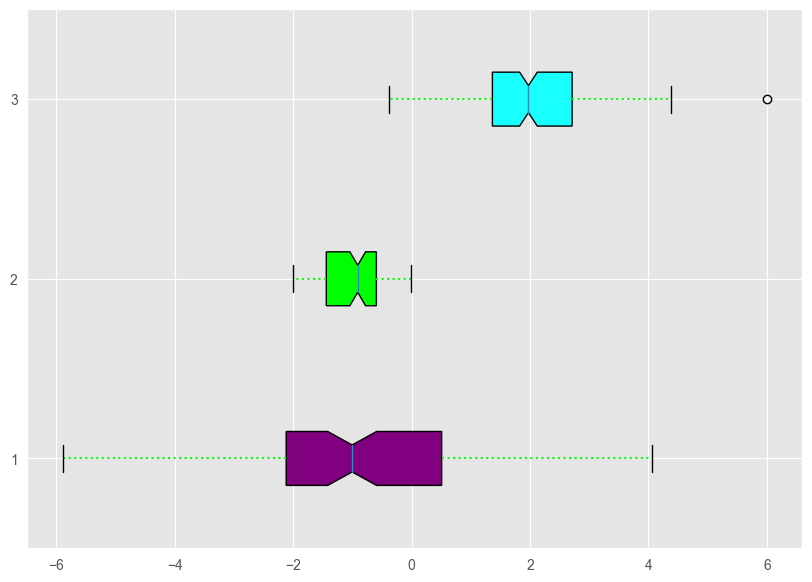

In [12]:
data = [X1, X2, X3]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['purple', 'lime',
          '#18FFFD']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='lime',
                linewidth = 1.5,
                linestyle =":")

In [13]:
stats.bartlett(X1, X2, X3)

BartlettResult(statistic=158.31910944712882, pvalue=4.1825601336917197e-35)

In [14]:
stats.f_oneway(X1, X2, X3)

F_onewayResult(statistic=269.6361912818869, pvalue=1.0878682295270675e-74)

In [15]:
K = 4
n = n1 + n2 + n3
mean = (sum(X1) + sum(X2) + sum(X3))/n

#общая дисперсия
s = 0
for ar in data:
  for x in ar:
    s += (x - mean)**2
D_x = s/n

#внутригрупповая дисперсиея
s = 0
for ar in data:
  s = s + len(ar) * np.var(ar)
D_w = s/n

#межгрупповая дисперсия
s = 0
for ar in data:
  s = s + len(ar) * (np.mean(ar) - mean)**2
D_b = s/n

print(f"{D_b = :.3f}")
print(f"{D_w = :.3f}")
print(f"{D_x = :.3f}")

print(f'Несмещенная оценка групировочного признака: {(D_b * n)/(K - 1):.3f}')
print(f'Несмещенная оценка остаточного признака: {(D_w * n)/(n - K):.3f}')
print(f'Несмещенная оценка всех признаков: {(D_x * n)/(n - 1):.3f}')

D_b = 2.106
D_w = 1.551
D_x = 3.657
Несмещенная оценка групировочного признака: 280.829
Несмещенная оценка остаточного признака: 1.566
Несмещенная оценка всех признаков: 3.666


### $\bar{D}_{межгр.}$
### $\bar{D}_{внутр.}$
### $\bar{D}_{общ.}$

In [16]:
eta_squared = D_b / D_x   #эмпирический коэффициент детерминации
eta = eta_squared ** (1/2)   #эмпирическое корреляционное отношение

print(f'эмпирический коэффициент детерминации: {eta_squared:.3f}')
print(f'эмпирическое корреляционное отношение: {eta:.3f}')

эмпирический коэффициент детерминации: 0.576
эмпирическое корреляционное отношение: 0.759


In [17]:
m1, m2, m3

(-0.7764808262435907, -0.9711955586251331, 2.025458818624577)

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
f_oneway(X1, X2, X3)

df = pd.DataFrame({'score': np.concatenate((X1, X2, X3)),
                   'group': np.concatenate((np.repeat(['data_1', 'data_2'], repeats=n1), np.repeat(['data_3'], repeats=n3)))})

tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
data_1 data_2  -0.1947 0.5137 -0.6106 0.2211  False
data_1 data_3   2.8019    0.0  2.4418 3.1621   True
data_2 data_3   2.9967    0.0  2.6365 3.3568   True
---------------------------------------------------


In [19]:
alpha = 0.05

c12 = m1 - m2
c13 = m1 - m3
c23 = m2 - m3

var12 = (n * D_w) * (1/n1 + 1/n2) / (n - K)
var13 = (n * D_w) * (1/n1 + 1/n3) / (n - K)
var23 = (n * D_w) * (1/n2 + 1/n3) / (n - K)

quantile_f = stats.f(K-1,n-K).ppf(1 - alpha)

c12_lower = c12 - (var12 * (K-1) * quantile_f)**(1/2)
c13_lower = c13 - (var13 * (K-1) * quantile_f)**(1/2)
c23_lower = c23 - (var23 * (K-1) * quantile_f)**(1/2)

c12_upper = c12 + (var12 * (K-1) * quantile_f)**(1/2)
c13_upper = c13 + (var13 * (K-1) * quantile_f)**(1/2)
c23_upper = c23 + (var23 * (K-1) * quantile_f)**(1/2)

C:\Users\PotatoHD\AppData\Local\Temp\ipykernel_37128\3823037524.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color=colors[i])


([<matplotlib.axis.YTick at 0x1daba90d2e0>,
 [Text(0, 0, 'C12'), Text(0, 1, 'C13'), Text(0, 2, 'C23')])

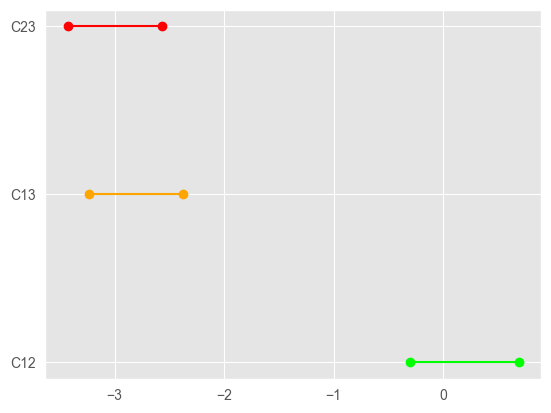

In [20]:
data_dict = {'category': ['C12','C13','C23'],
             'lower': [c12_lower, c13_lower, c23_lower],
             'upper': [c12_upper, c13_upper, c23_upper]}
dataset = pd.DataFrame(data_dict)
colors = ['lime', 'orange', 'red']
i = 0
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color=colors[i])
    i += 1
plt.yticks(range(len(dataset)),list(dataset['category']))